In [43]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import pandas as pd
import benchmark
import matplotlib.pyplot as plt
import matplotlib

In [2]:
housing_file_location="../examples/data/house_prices.parquet"
sf_crime_file_location="../examples/data/sf_crime.parquet"
titanic_file_location="../examples/data/titanic.parquet"

In [3]:
!mkdir figs

mkdir: figs: File exists


In [4]:
def plot_all(bench_dict, name='test'):
    N = len(bench_dict.items())
    i = 0
    transformer=""
    fig, ax = plt.subplots(1, 2, figsize=[18, 8], tight_layout=True)
    plt.subplots_adjust(wspace=0.1)
    dfs=[]
    for key, value in bench_scalers.items():
        df = value.copy()
        df.index = [key]
        dfs.append(df)
        transformer = str(value.index[0]).split('_')[0]
    final_df = pd.concat(dfs)
    (final_df*1e-3).plot.bar(
        ax=ax[0],
        rot=0,
        color=['#c73d22', '#0077ea'],
        logy=True,
        ylabel='runtime (s)',
        xlabel='# of columns',
        ylim=[1e-6, 1],
        width=0.75,
        figsize=[7*1.60, 5],
        legend=True,
        fontsize=14)
    (final_df['pandas']/final_df['numpy']).plot.bar(
        ax=ax[1],
        rot=0,
        color=['#0077ea'],
        legend=False,
        ylabel='runtime speed-up',
        xlabel='# of columns',
        figsize=[7*1.60, 5],
        width=0.75,
        fontsize=14)
    ax[1].xaxis.label.set_fontsize(14)
    ax[0].xaxis.label.set_fontsize(14)
    ax[1].yaxis.label.set_fontsize(14)
    ax[0].yaxis.label.set_fontsize(14)


    ax[1].set_ylabel('runtime speed-up', labelpad=-25)
    matplotlib.rcParams['legend.fontsize'] = 12
    
    for p in ax[1].patches:
        ax[1].annotate(
            f'{round(p.get_height())}X',
            (p.get_x()+p.get_width()/2., p.get_height()),
            ha='center',
            va='center',
            xytext=(0, 10), textcoords='offset points', fontsize=14)

    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].spines['bottom'].set_visible(False)
    ax[1].spines['left'].set_visible(False)
    ax[1].get_yaxis().set_ticks([])
    ax[1].yaxis.label.set_fontsize(14)
    ax[1].xaxis.label.set_fontsize(14)
    title = f'''{transformer}'''
    plt.suptitle(title, fontsize=16)
    fig.tight_layout()
    fig.savefig(f"figs/{name}_transform_numpy.jpg")
    plt.show()
    plt.close(fig)

In [5]:
n_vec = [1, 10, 100]

In [6]:
# DropHighCardinality
from gators.data_cleaning import DropHighCardinality
sf_crime_df = pd.read_parquet(sf_crime_file_location)
objs = [DropHighCardinality(max_categories=3)]
columns = ["Category", "Address"]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)

/Users/cpoli/opensource/gators/benchmarks/benchmark.py:313: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  XN[f"{col}{i}"] = X[col].copy()


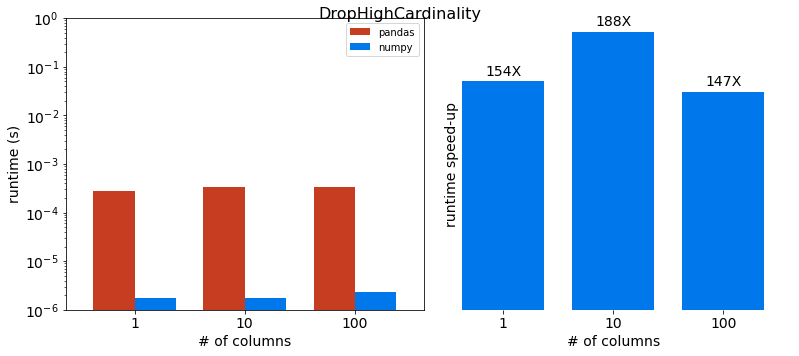

In [7]:
plot_all(bench_scalers, name="DropHighCardinality")

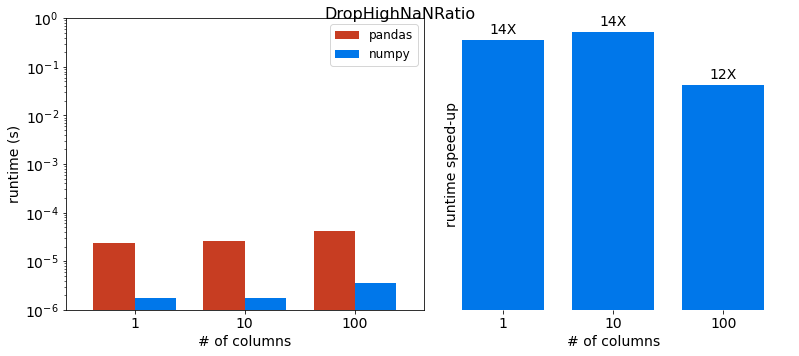

In [8]:
from gators.data_cleaning import DropHighNaNRatio
sf_crime_df = pd.read_parquet(sf_crime_file_location)
objs = [DropHighNaNRatio(max_ratio=0.5)]
columns = ["Category", "Address"]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name="DropHighNaNRatio")

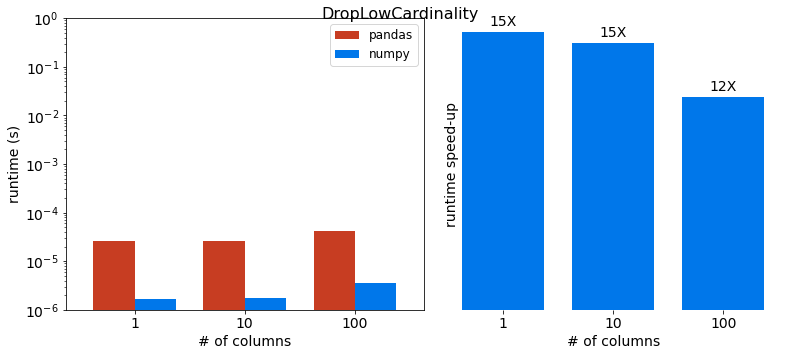

In [9]:
from gators.data_cleaning import DropLowCardinality
sf_crime_df = pd.read_parquet(sf_crime_file_location)
objs = [DropLowCardinality(min_categories=2)]
columns = ["Category", "Address"]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name="DropLowCardinality")

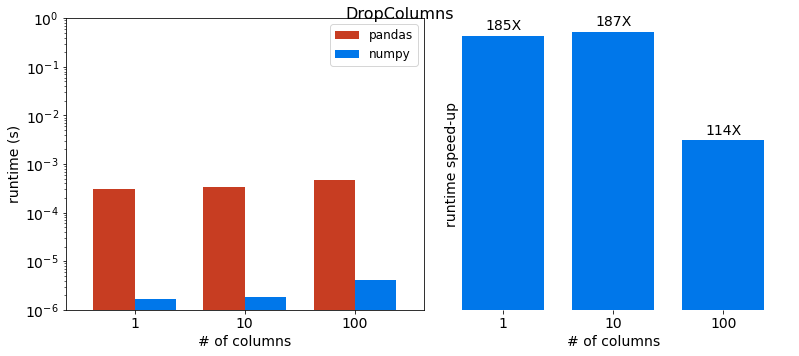

In [10]:
from gators.data_cleaning import DropColumns
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns = ["Category", "Address"]
objs = [DropColumns(columns)]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name="DropColumns")

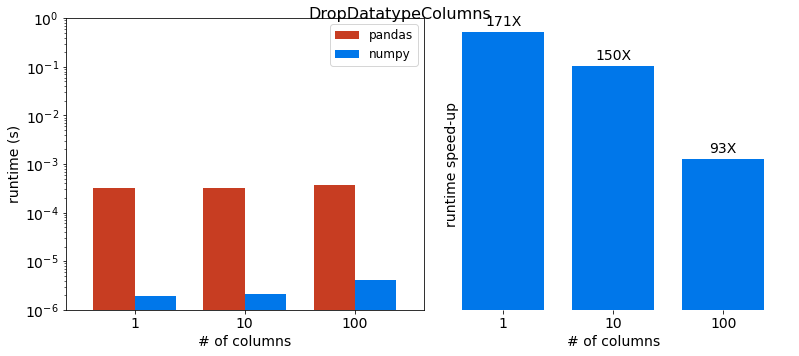

In [11]:
from gators.data_cleaning import DropDatatypeColumns
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns = ["Category", "Address", "X", "Y"]
objs = [DropDatatypeColumns(float)]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name="DropDatatypeColumns")

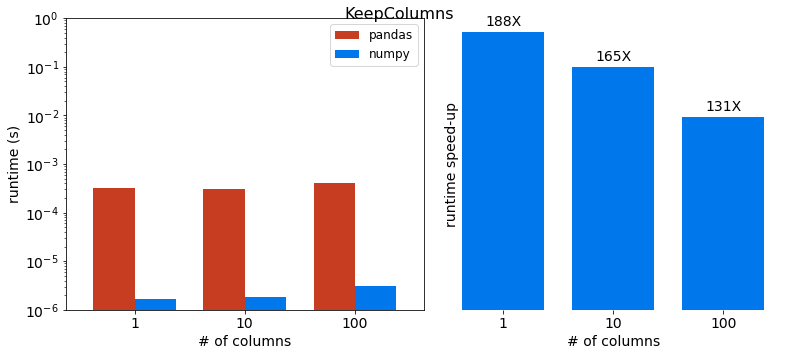

In [12]:
from gators.data_cleaning import KeepColumns
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns = ["Category", "Address", "X", "Y"]
objs = [KeepColumns(["Category", "Address"])]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name="KeepColumns")

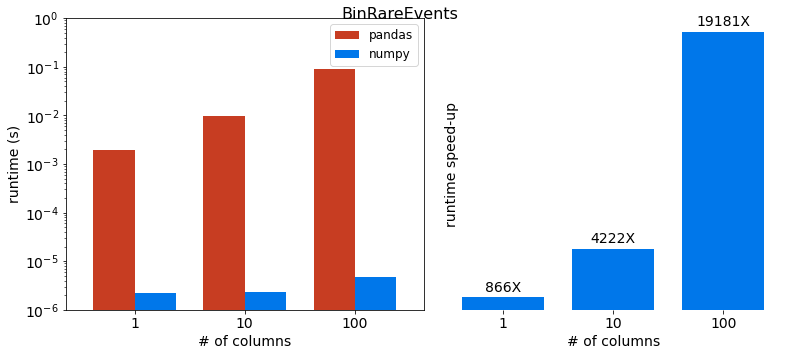

In [13]:
from gators.binning import BinRareCategories
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns=["Category", "Address"]
objs = [BinRareCategories(min_ratio=0.5)]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name="BinRareCategories")

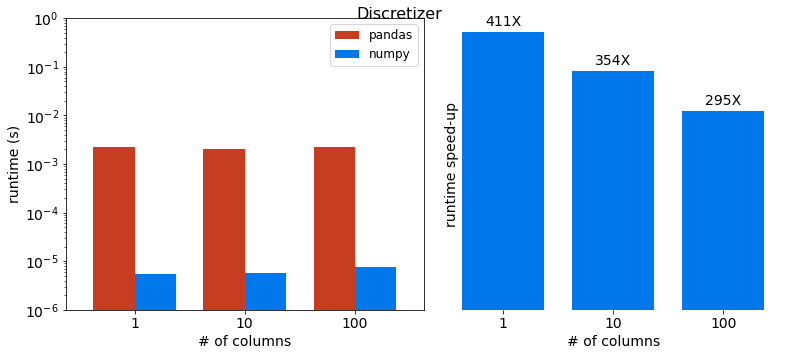

In [14]:
from gators.binning import Binning
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns=["Category", "Address"]
objs = [Binning(n_bins=3)]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name="Binning")

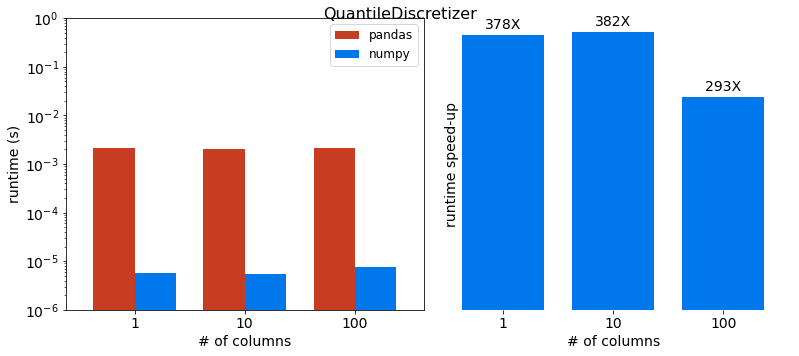

In [15]:
from gators.binning import QuantileBinning
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns=["Category", "Address"]
objs = [QuantileBinning(n_bins=3)]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name="QuantileBinning")

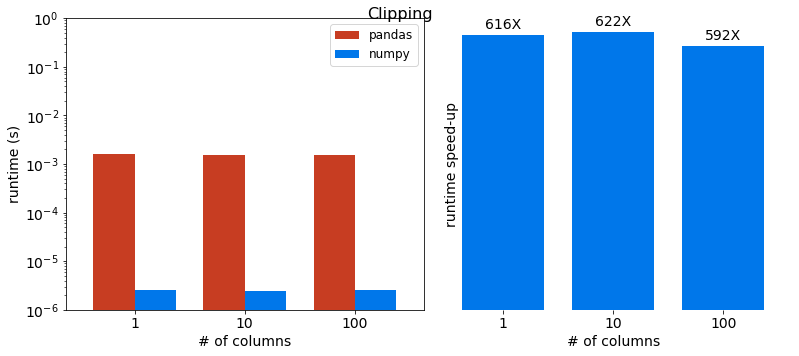

In [16]:
from gators.clipping import Clipping
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns=["X", "Y"]
sf_crime_df = sf_crime_df[columns]
objs = [Clipping({"X":[-121.5, 122.5], "Y":[37.5, 37.75]})]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name="Clipping")

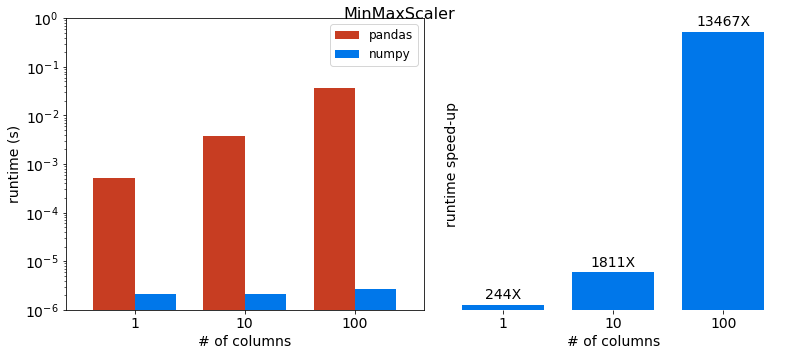

In [17]:
from gators.scalers import MinMaxScaler
housing_df = pd.read_parquet(sf_crime_file_location)
columns=["X", "Y"]
sf_crime_df=housing_df[columns]
objs = [MinMaxScaler()]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name="MinMaxScaler")

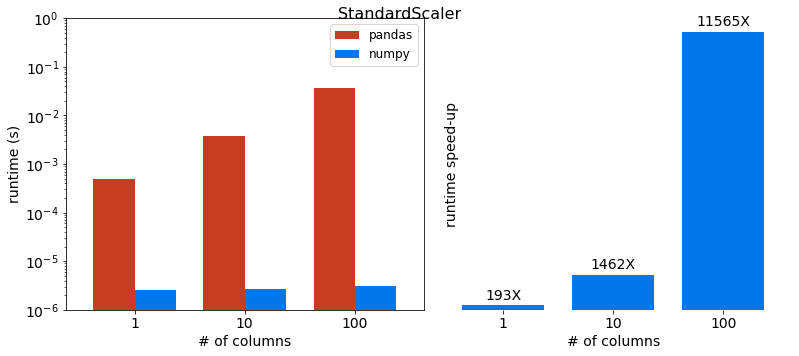

In [18]:
from gators.scalers import StandardScaler
housing_df = pd.read_parquet(sf_crime_file_location)
columns=["X", "Y"]
sf_crime_df=housing_df[columns]
objs = [StandardScaler()]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name="StandardScaler")

/Users/cpoli/opensource/gators/benchmarks/benchmark.py:313: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  XN[f"{col}{i}"] = X[col].copy()


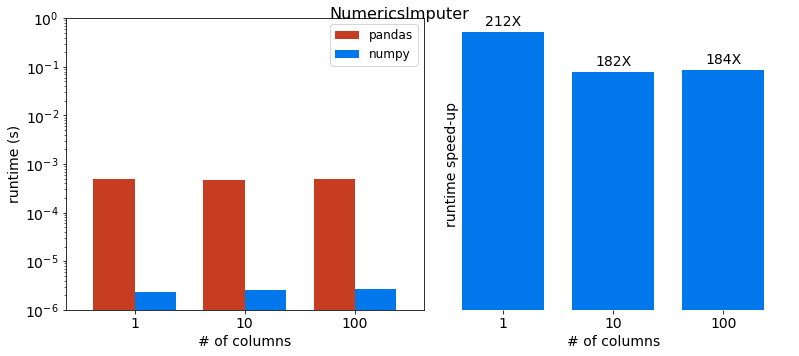

In [22]:
from gators.imputers import NumericsImputer
housing_df = pd.read_parquet(housing_file_location)
columns = ["MasVnrArea", "GarageYrBlt", "LotFrontage"]
housing_df = housing_df[columns]
objs = [NumericsImputer(strategy='median')]
bench_scalers = benchmark.run_X(objs, housing_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name="NumericsImputer")

/Users/cpoli/opensource/gators/benchmarks/benchmark.py:313: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  XN[f"{col}{i}"] = X[col].copy()


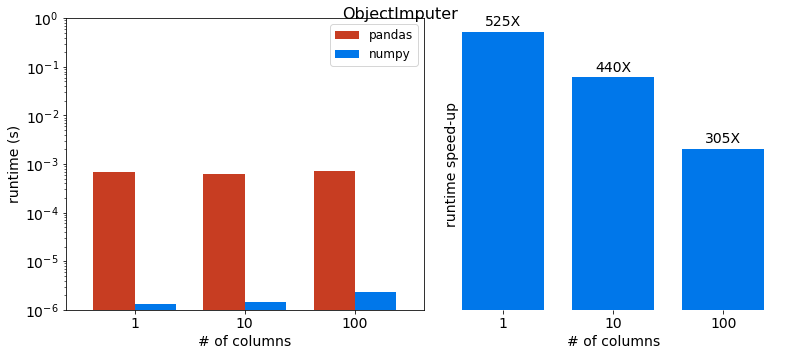

In [23]:
from gators.imputers import ObjectImputer
housing_df = pd.read_parquet(housing_file_location)
columns = ["MasVnrType", "BsmtFinType2", "FireplaceQu"]
housing_df = housing_df[columns]
objs = [ObjectImputer(strategy='most_frequent')]
bench_scalers = benchmark.run_X(objs, housing_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name="ObjectImputer")

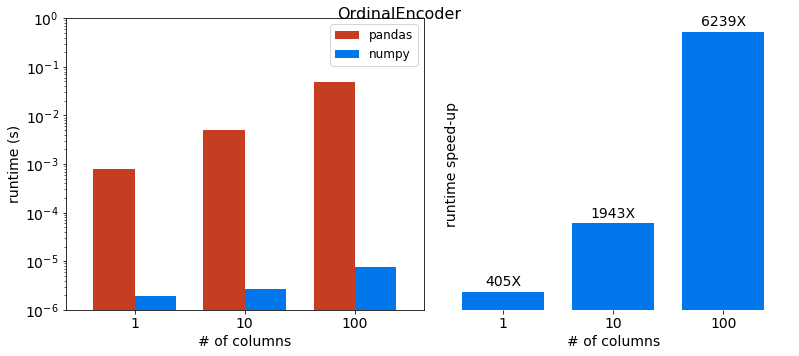

In [24]:
# ENCODERS 
from gators.encoders import OrdinalEncoder
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns = ["Category"]
sf_crime_df = sf_crime_df[columns]
objs = [OrdinalEncoder()]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name="OrdinalEncoder")

/Users/cpoli/gators38/lib/python3.8/site-packages/gators-0.2.0-py3.8-macosx-10.9-x86_64.egg/gators/encoders/onehot_encoder.py:140: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  X[onehot_col] = X[col] == cat


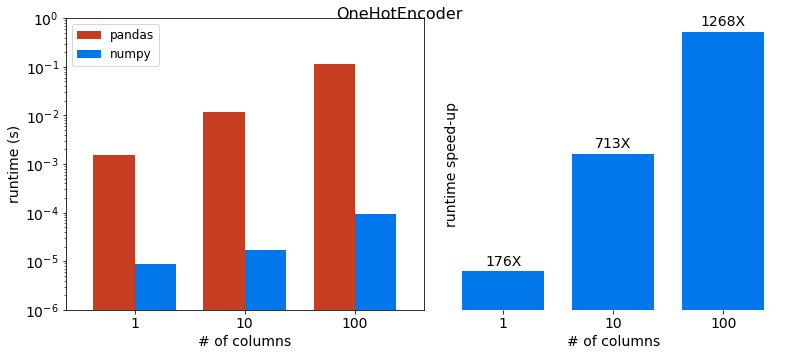

In [25]:
from gators.encoders import OneHotEncoder
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns = ["Category"]
sf_crime_df = sf_crime_df[columns]
objs = [OneHotEncoder()]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name="OneHotEncoder")

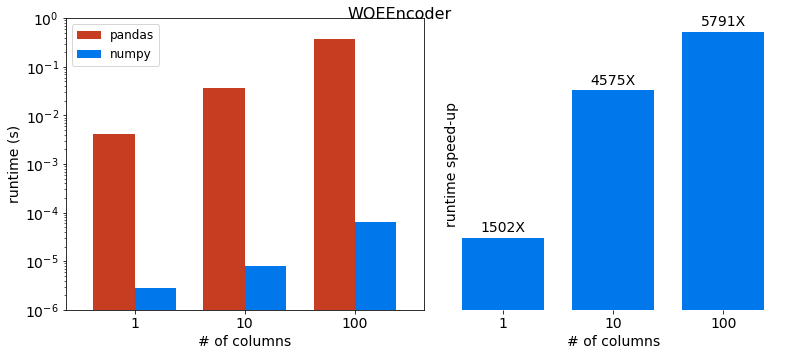

In [26]:
from gators.encoders import WOEEncoder
titanic_df = pd.read_parquet(titanic_file_location)
imputer = ObjectImputer(strategy='most_frequent')
titanic_df = imputer.fit_transform(titanic_df)
columns = ["Cabin", "Embarked"]
sf_crime_df = titanic_df[columns]
objs = [WOEEncoder()]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec, y=titanic_df["Survived"])
plot_all(bench_scalers, name="WOEEncoder")

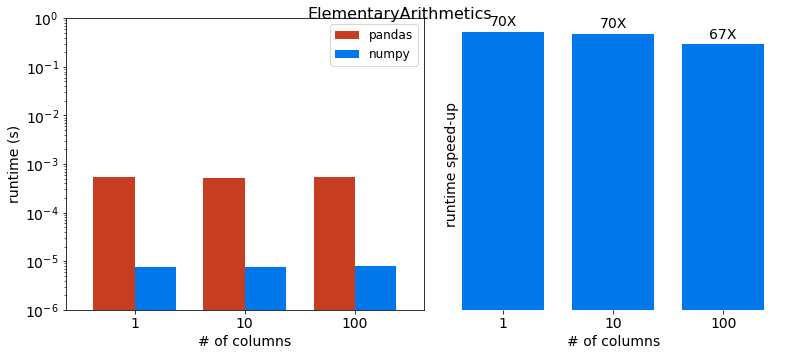

In [27]:
# Feature Generation
from gators.feature_generation import ElementaryArithmetics
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns = ["X","Y"]
sf_crime_df = sf_crime_df[columns]
# Why filter for columns , even though column names are given in constructor
objs = [ElementaryArithmetics(columns_a=["X"], columns_b=["Y"], operator='+', coef=0.1)]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name="ElementaryArithmetics")

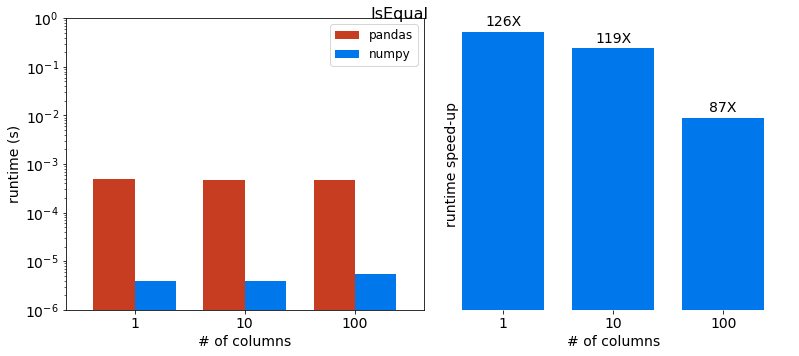

In [28]:
from gators.feature_generation import IsEqual
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns = ["X","Y"]
#sf_crime_df = sf_crime_df[columns]
objs = [IsEqual(columns_a=["X"], columns_b=["Y"])]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name="IsEqual")

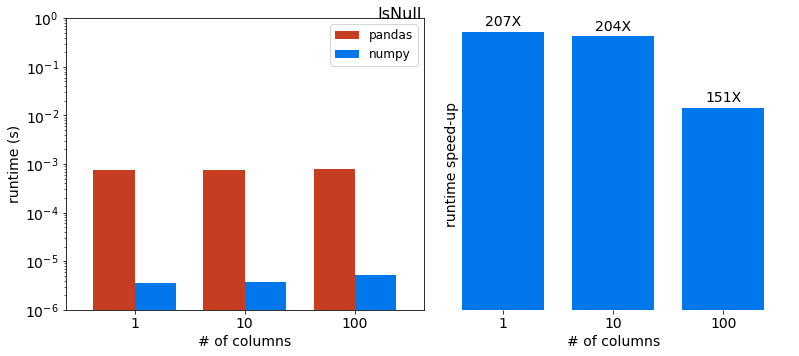

In [29]:
from gators.feature_generation import IsNull
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns = ["X","Y"]
#sf_crime_df = sf_crime_df[columns]
objs = [IsNull(columns=["X", "Y"])]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name="IsNull")

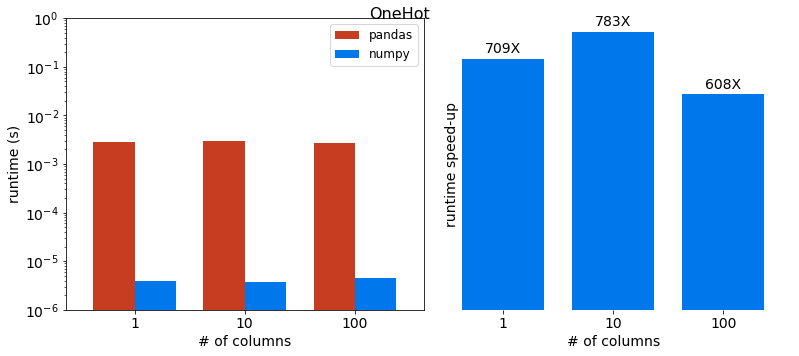

In [30]:
from gators.feature_generation import OneHot
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns = ["Category"]
sf_crime_df = sf_crime_df[columns]
objs = [OneHot(categories_dict={"Category":['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
                                   'VANDALISM', 'NON-CRIMINAL', 'ASSAULT', 'BURGLARY',
                                   'SUSPICIOUS OCC', 'MISSING PERSON']})]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name="OneHot")

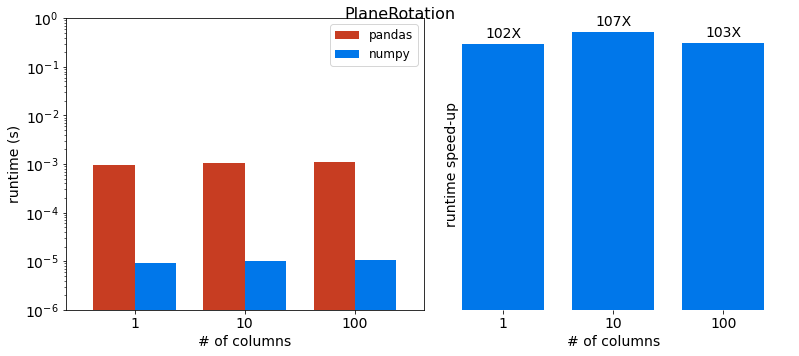

In [31]:
from gators.feature_generation import PlaneRotation
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns = ["X","Y"]
#sf_crime_df = sf_crime_df[columns]
objs = [PlaneRotation(columns = [['X', 'Y']], theta_vec = [45.0])]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name="PlaneRotation")
# error in documentation check constructor syntax

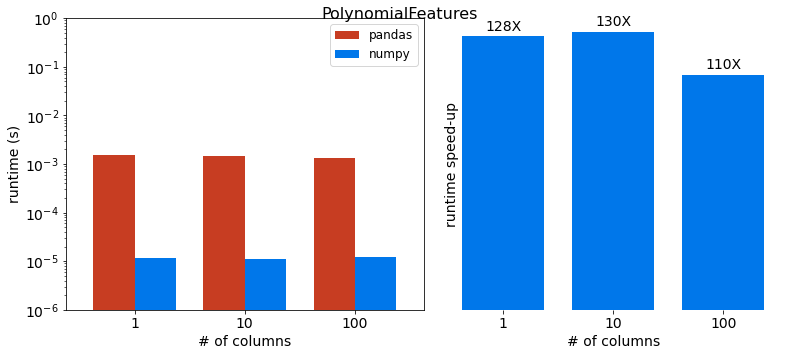

In [32]:
from gators.feature_generation import PolynomialFeatures
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns = ["X","Y"]
#sf_crime_df = sf_crime_df[columns]
objs = [PolynomialFeatures(columns = ['X', 'Y'])]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name="PolynomialFeatures")

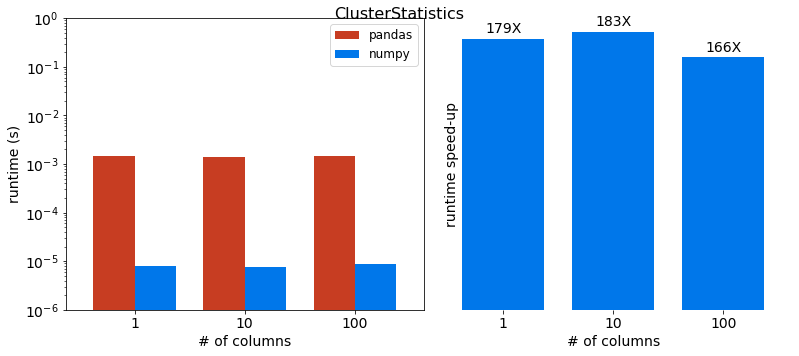

In [33]:
from gators.feature_generation import ClusterStatistics
housing_df = pd.read_parquet(housing_file_location)
columns = ["MSSubClass", "LotArea"]
clusters_dict = {
    'cluster_name_a': columns,
}
objs = [ClusterStatistics(clusters_dict=clusters_dict)]
bench_scalers = benchmark.run_X(objs, housing_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name="ClusterStatistics")

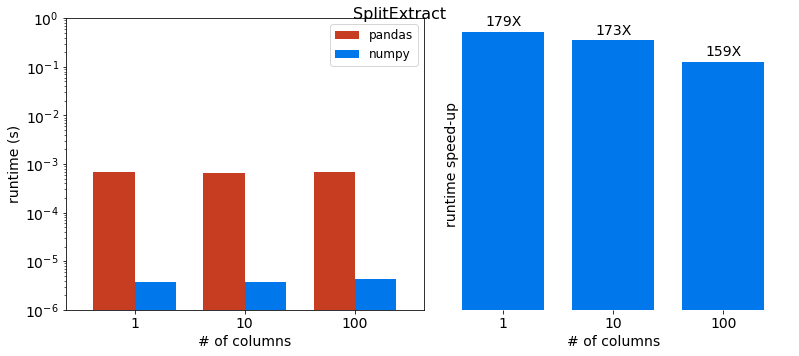

In [34]:
from gators.feature_generation_str import SplitExtract
titanic_df = pd.read_parquet(titanic_file_location)
objs = [SplitExtract(['Name'], [', '], [1], ['Dummy'])]
columns = ["Name"]
bench_scalers = benchmark.run_X(objs, titanic_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name="SplitExtract")

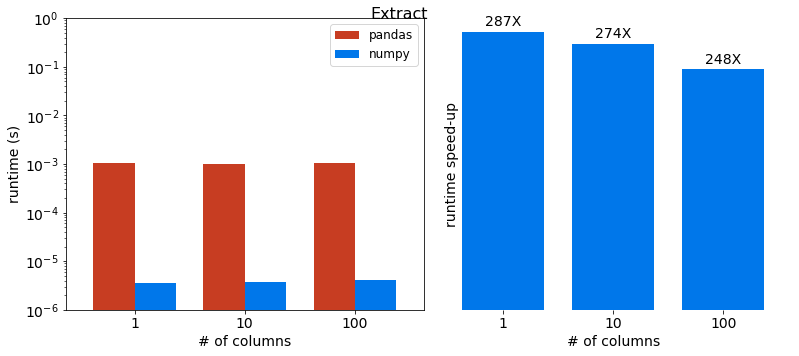

In [35]:
from gators.feature_generation_str import Extract
titanic_df = pd.read_parquet(titanic_file_location)
columns = ["Name"]
objs = [Extract(columns=['Name','Name'], i_min_vec=[0, 2], i_max_vec=[1, 3])]
bench_scalers = benchmark.run_X(objs, titanic_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name="Extract")

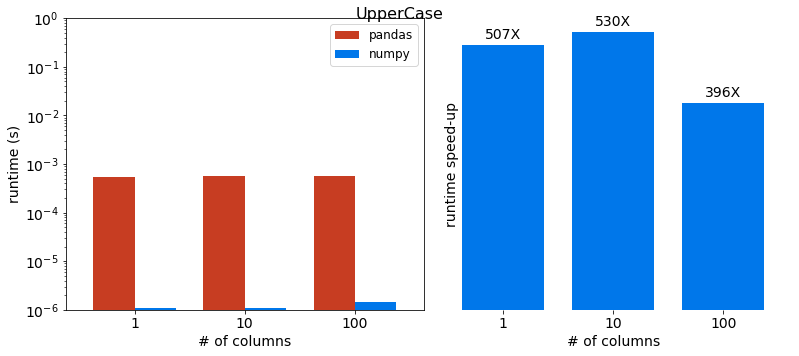

In [41]:
from gators.feature_generation_str import UpperCase
titanic_df = pd.read_parquet(titanic_file_location)
columns = ["Name"]
objs = [UpperCase(columns=['Name'])]
bench_scalers = benchmark.run_X(objs, titanic_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name="UpperCase")

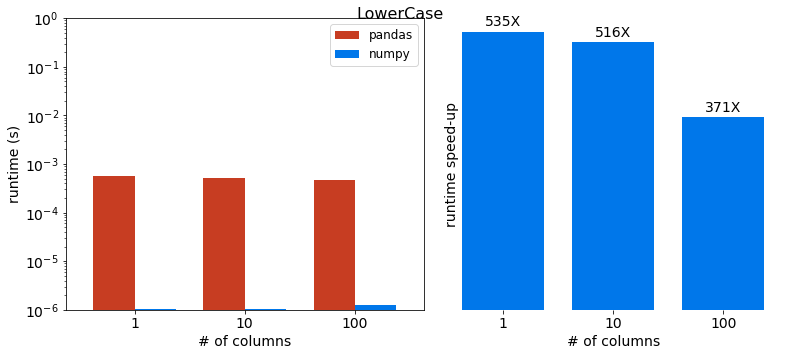

In [42]:
from gators.feature_generation_str import LowerCase
titanic_df = pd.read_parquet(titanic_file_location)
columns = ["Name"]
objs = [LowerCase(columns=['Name'])]
bench_scalers = benchmark.run_X(objs, titanic_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name="LowerCase")

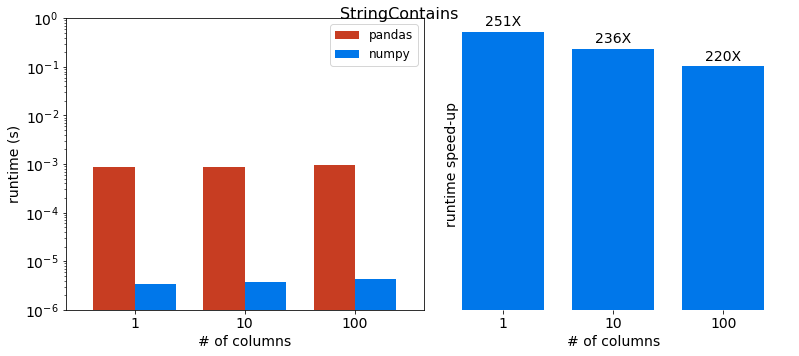

In [36]:
from gators.feature_generation_str import StringContains
titanic_df = pd.read_parquet(titanic_file_location)
columns = ["Name"]
objs = [StringContains(columns=['Name', 'Name'], contains_vec=['Mr', 'Mrs'])]
bench_scalers = benchmark.run_X(objs, titanic_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name="StringContains")

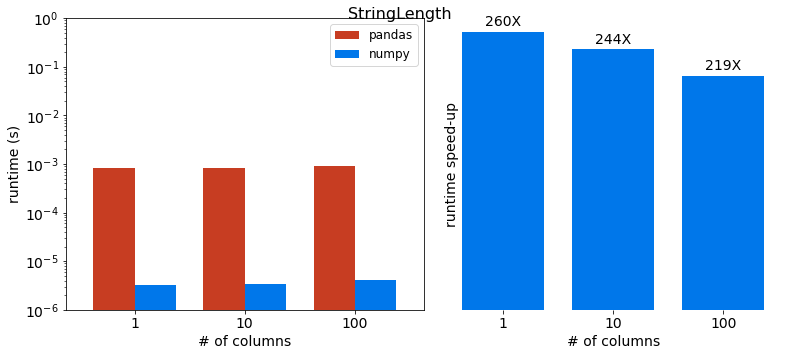

In [37]:
from gators.feature_generation_str import StringLength
titanic_df = pd.read_parquet(titanic_file_location)
columns = ["Name"]
objs = [StringLength(columns=['Name'])]
bench_scalers = benchmark.run_X(objs, titanic_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name="StringLength")

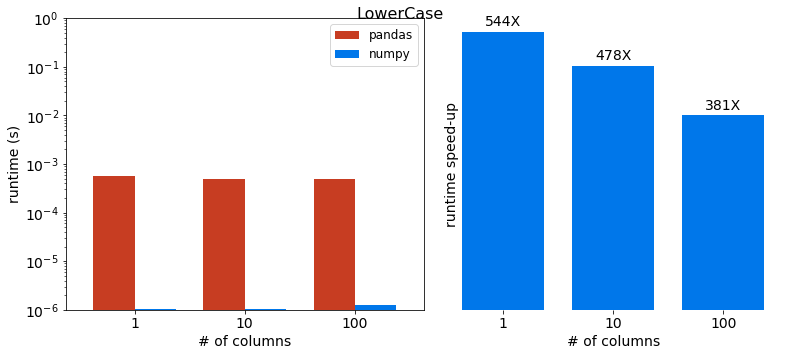

In [38]:
from gators.feature_generation_str import LowerCase
titanic_df = pd.read_parquet(titanic_file_location)
columns = ["Name"]
objs = [LowerCase(columns=['Name'])]
bench_scalers = benchmark.run_X(objs, titanic_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name="LowerCase")

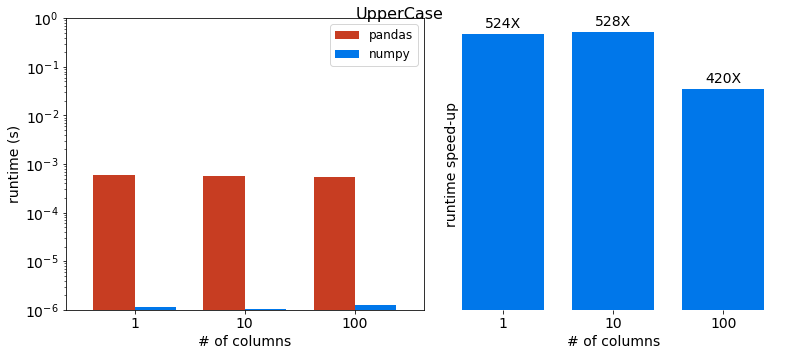

In [39]:
from gators.feature_generation_str import UpperCase
titanic_df = pd.read_parquet(titanic_file_location)
columns = ["Name"]
objs = [UpperCase(columns=['Name'])]
bench_scalers = benchmark.run_X(objs, titanic_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name="UpperCase")

/Users/cpoli/opensource/gators/benchmarks/benchmark.py:322: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  bench_dict[n] = generate_per_sample_benchmarking(


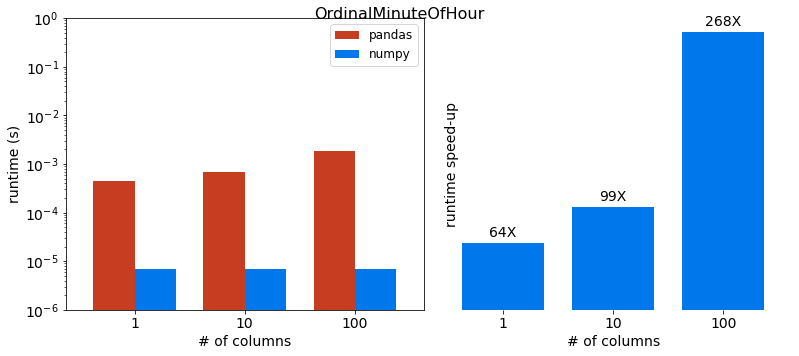

In [70]:
from gators.feature_generation_dt import OrdinalMinuteOfHour
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns = ["Dates"]
objs = [OrdinalMinuteOfHour(columns = ["Dates"])]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name="OrdinalMinuteOfHour")

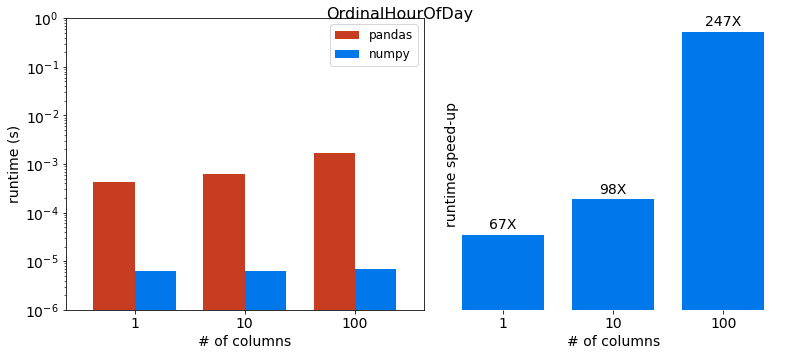

In [72]:
from gators.feature_generation_dt import OrdinalHourOfDay
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns = ["Dates"]
objs = [OrdinalHourOfDay(columns = ["Dates"])]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name="OrdinalHourOfDay")

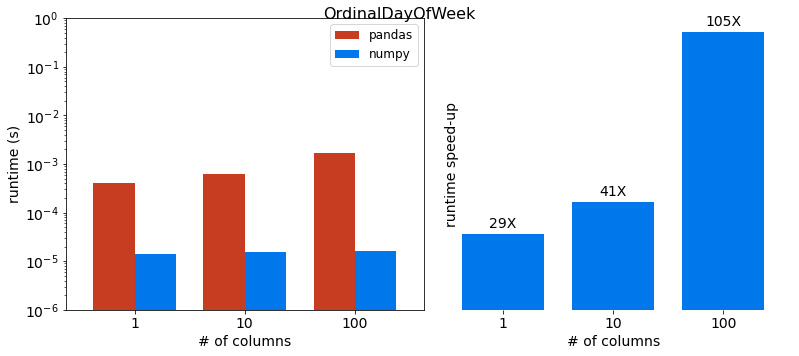

In [73]:
from gators.feature_generation_dt import OrdinalDayOfWeek
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns = ["Dates"]

objs = [OrdinalDayOfWeek(columns = ["Dates"])]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name="OrdinalDayOfWeek")

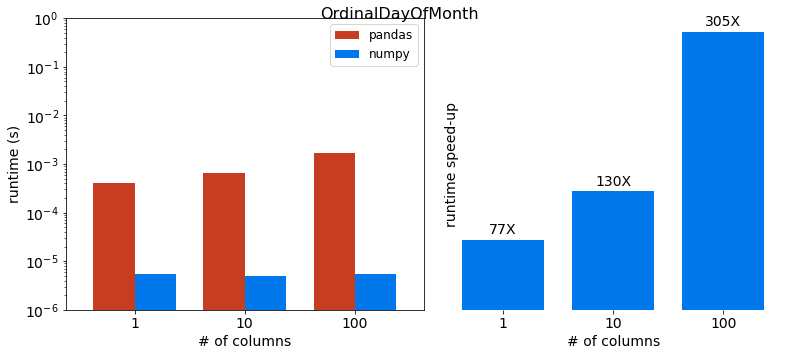

In [75]:
from gators.feature_generation_dt import OrdinalDayOfMonth
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns = ["Dates"]
objs = [OrdinalDayOfMonth(columns = ["Dates"])]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name="OrdinalDayOfMonth")

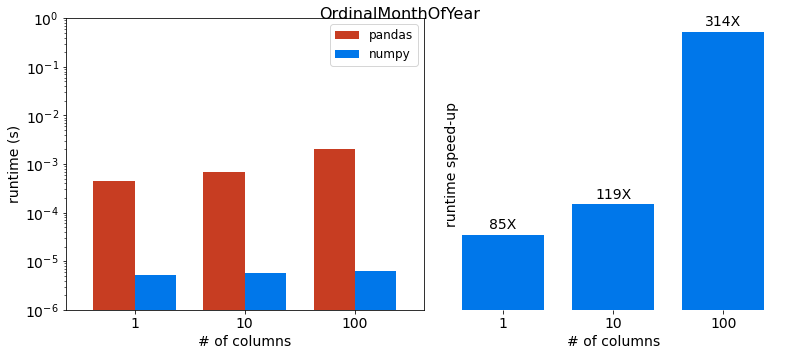

In [77]:
from gators.feature_generation_dt import OrdinalMonthOfYear
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns = ["Dates"]
objs = [OrdinalMonthOfYear(columns = ["Dates"])]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name="OrdinalMonthOfYear")

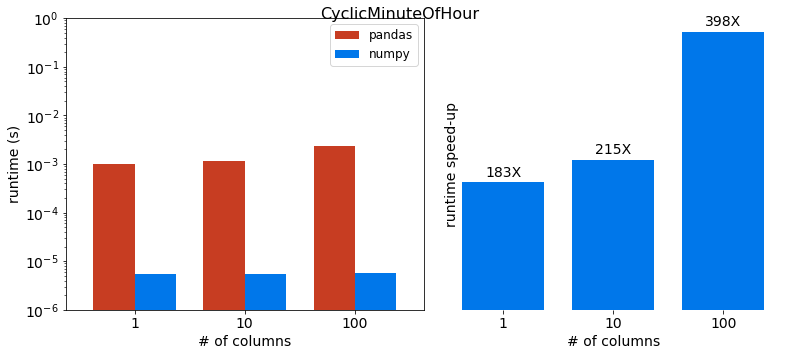

In [78]:
from gators.feature_generation_dt import CyclicMinuteOfHour
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns = ["Dates"]
objs = [CyclicMinuteOfHour(columns = ["Dates"])]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name="CyclicMinuteOfHour")

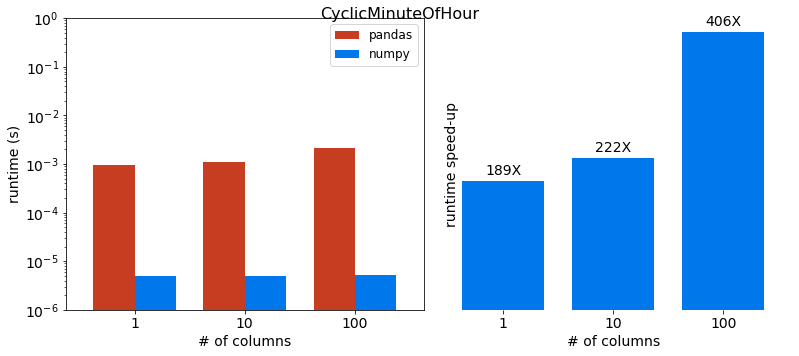

In [79]:
from gators.feature_generation_dt import CyclicMinuteOfHour
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns = ["Dates"]
objs = [CyclicMinuteOfHour(columns = ["Dates"])]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name="CyclicMinuteOfHour")

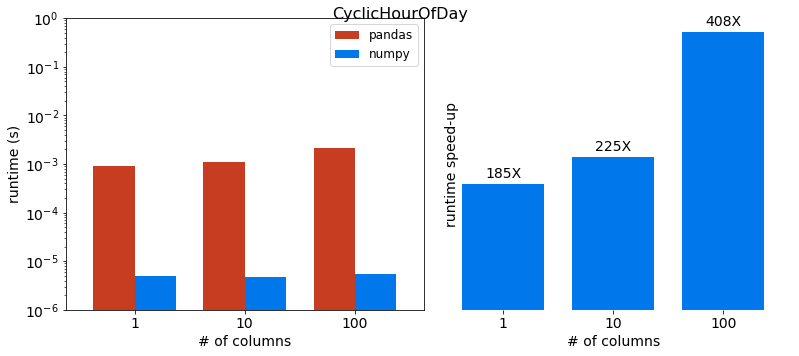

In [80]:
from gators.feature_generation_dt import CyclicHourOfDay
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns = ["Dates"]
objs = [CyclicHourOfDay(columns = ["Dates"])]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name="CyclicHourOfDay")

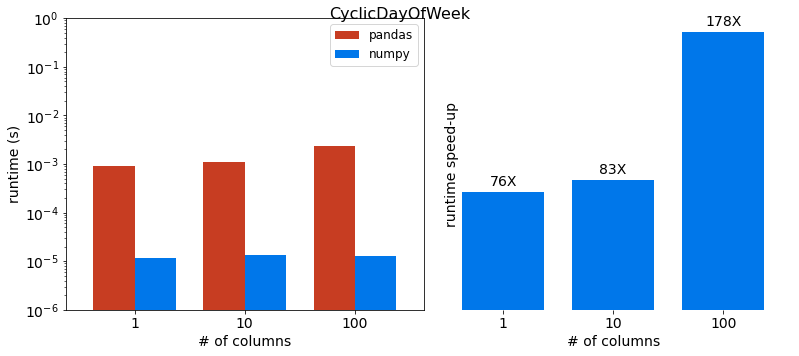

In [81]:
from gators.feature_generation_dt import CyclicDayOfWeek
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns = ["Dates"]
objs = [CyclicDayOfWeek(columns = ["Dates"])]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name="CyclicDayOfWeek")

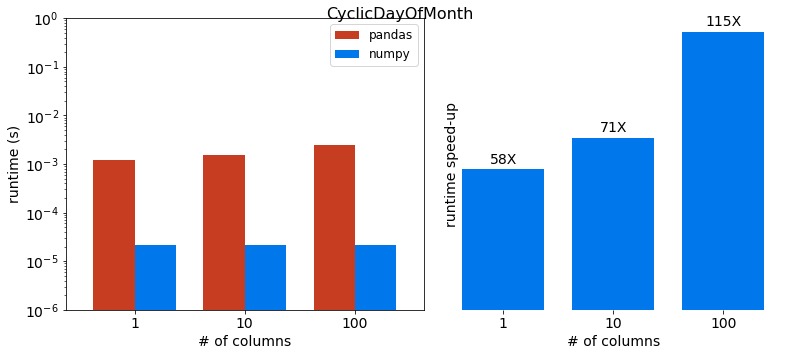

In [82]:
from gators.feature_generation_dt import CyclicDayOfMonth
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns = ["Dates"]
objs = [CyclicDayOfMonth(columns = ["Dates"])]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name="CyclicDayOfMonth")

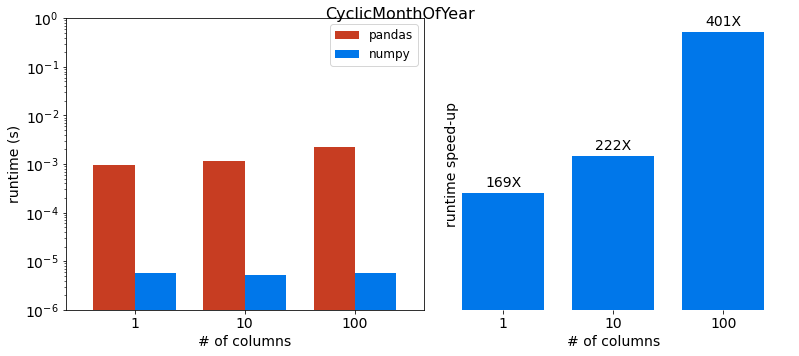

In [83]:
from gators.feature_generation_dt import CyclicMonthOfYear
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns = ["Dates"]
objs = [CyclicMonthOfYear(columns = ["Dates"])]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name="CyclicMonthOfYear")

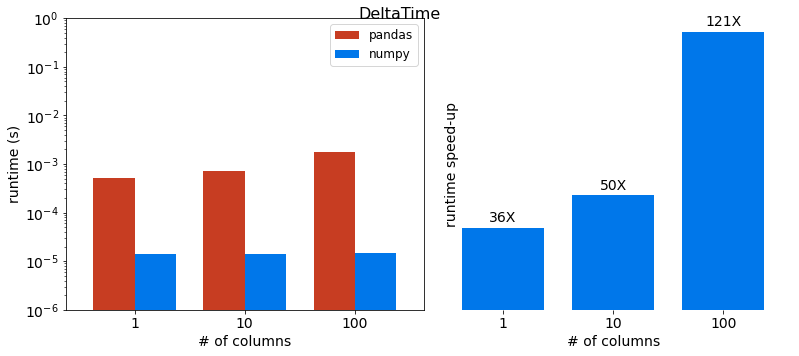

In [84]:
from gators.feature_generation_dt import DeltaTime
sf_crime_df = pd.read_parquet(sf_crime_file_location)
columns = ["Dates"]
objs = [DeltaTime(columns_a = ["Dates"], columns_b = ["Dates"])]
bench_scalers = benchmark.run_X(objs, sf_crime_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name="DeltaTime")

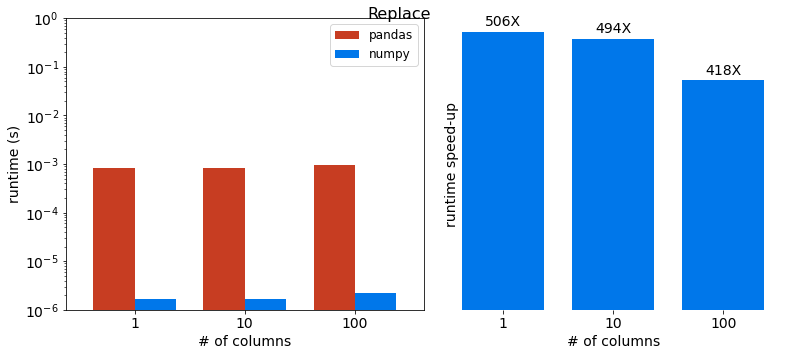

In [85]:
from gators.data_cleaning import Replace
housing_df = pd.read_parquet(housing_file_location)
columns = ["RoofStyle", "HouseStyle"]
to_replace_dict = {'RoofStyle': {'Gable': 'Non-Gable', 'Flat': 'Apartment'}, 'HouseStyle': {'2Story': '2Floors'}}
objs = [Replace(to_replace_dict=to_replace_dict)]
bench_scalers = benchmark.run_X(objs, housing_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name="Replace")

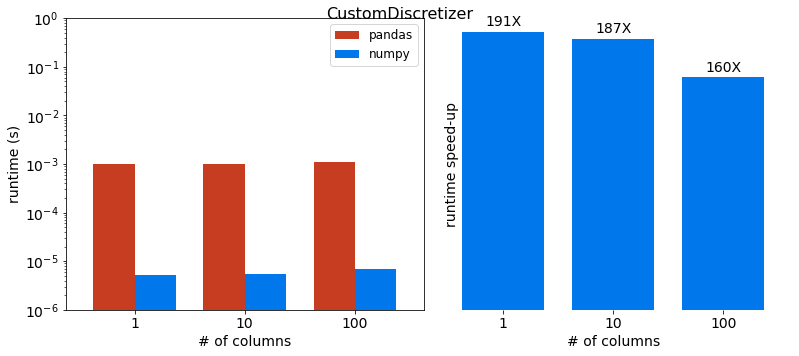

In [86]:
from gators.binning import CustomBinning
bins = {'LotArea':[1300, 13000, 216000]}
column = ["LotArea"]
objs = [CustomBinning(bins=bins)]
bench_scalers = benchmark.run_X(objs, housing_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name="CustomBinning")

/Users/cpoli/opensource/gators/benchmarks/benchmark.py:322: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  XN[f"{col}{i}"] = X[col].copy()


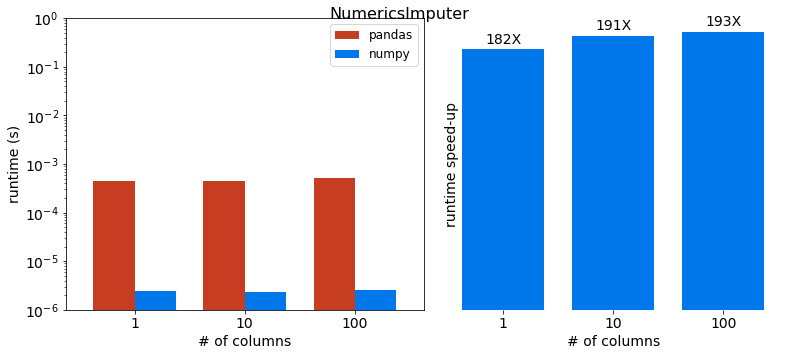

In [87]:
from gators.imputers import NumericsImputer
housing_df = pd.read_parquet(housing_file_location)
columns = ["MasVnrArea", "GarageYrBlt", "LotFrontage"]
housing_df = housing_df[columns]
objs = [NumericsImputer(strategy='median')]
bench_scalers = benchmark.run_X(objs, housing_df, columns, n_vec=n_vec)
plot_all(bench_scalers, name="IntImputer")

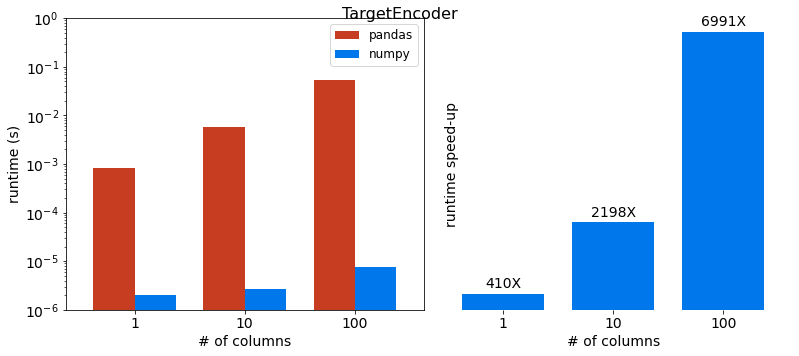

In [88]:
from gators.encoders import TargetEncoder
housing_df = pd.read_parquet(housing_file_location)
y = pd.Series(list(np.random.randint(0, high=2, size=1460)), name='TARGET')
columns = ["RoofStyle"]
housing_df = housing_df[columns]
objs = [TargetEncoder()]
bench_scalers = benchmark.run_X(objs, housing_df, columns, n_vec=n_vec, y=y)
plot_all(bench_scalers, name="TargetEncoder")